In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Files and folders here:", os.listdir())

# If you see 'earthquake_data' folder, list inside it:
if "earthquake_data" in os.listdir():
    print("Inside earthquake_data:", os.listdir("earthquake_data"))


In [14]:
df1 = pd.read_csv("C:\\Users\\h\\Downloads\\archive (1)\\earthquake_1995-2023.csv")
df2 = pd.read_csv(r"C:\Users\h\Downloads\archive (1)\earthquake_data.csv")

In [15]:
# 1. Inspect structure
# ----------------------------
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)
print("\nDataset 1 info:")
print(df1.info())
print("\nDataset 2 info:")
print(df2.info())

Dataset 1 shape: (1000, 19)
Dataset 2 shape: (782, 19)

Dataset 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 no

In [16]:
# 2. Missing values & duplicates
# ----------------------------
print("\nMissing values in Dataset 1:\n", df1.isnull().sum())
print("\nMissing values in Dataset 2:\n", df2.isnull().sum())
print("\nDuplicates in Dataset 1:", df1.duplicated().sum())
print("Duplicates in Dataset 2:", df2.duplicated().sum())


Missing values in Dataset 1:
 title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

Missing values in Dataset 2:
 title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

Duplicates in Dataset 1: 0
Duplicates in Dataset 2: 0


In [17]:
# 3. Summary statistics
# ----------------------------
print("\nSummary Statistics (Dataset 1):")
print(df1.describe(include='all'))
print("\nSummary Statistics (Dataset 2):")
print(df2.describe(include='all'))


Summary Statistics (Dataset 1):
                                        title    magnitude         date_time  \
count                                    1000  1000.000000              1000   
unique                                    984          NaN               990   
top     M 6.5 - Kermadec Islands, New Zealand          NaN  11-01-2022 12:39   
freq                                        3          NaN                 3   
mean                                      NaN     6.940150               NaN   
std                                       NaN     0.438148               NaN   
min                                       NaN     6.500000               NaN   
25%                                       NaN     6.600000               NaN   
50%                                       NaN     6.800000               NaN   
75%                                       NaN     7.100000               NaN   
max                                       NaN     9.100000               NaN   

      

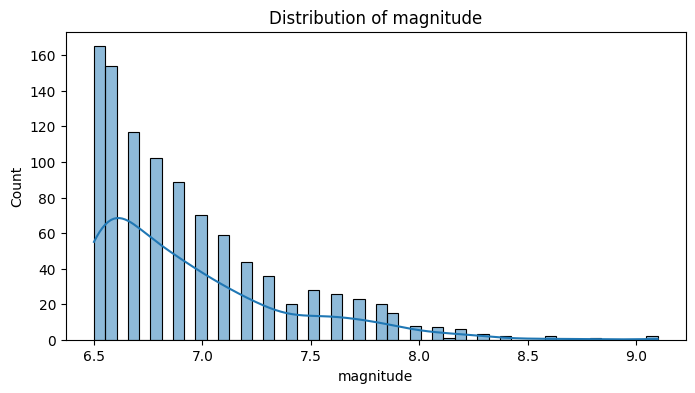

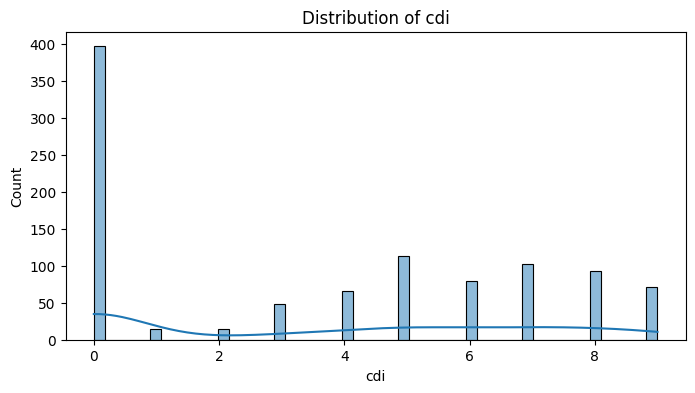

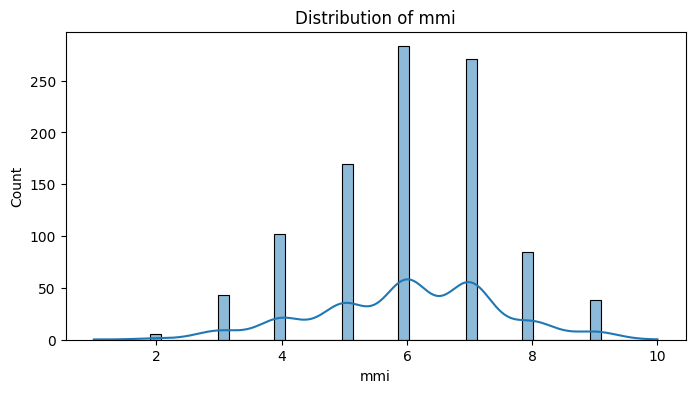

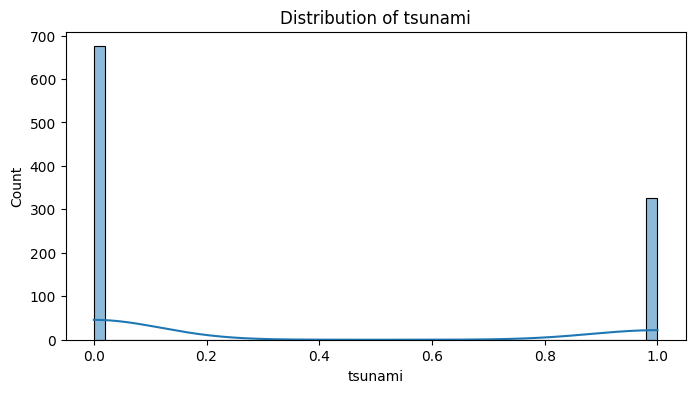

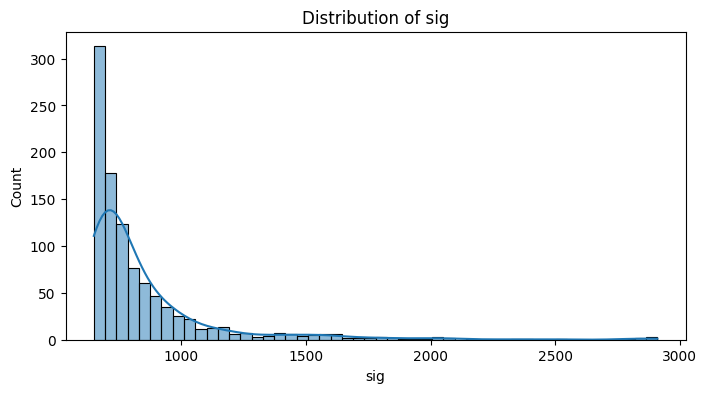

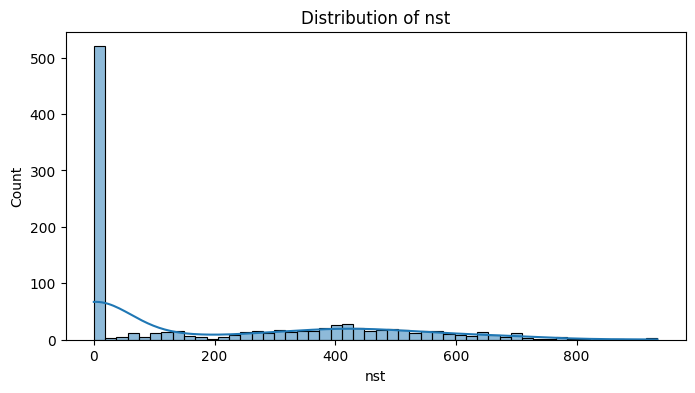

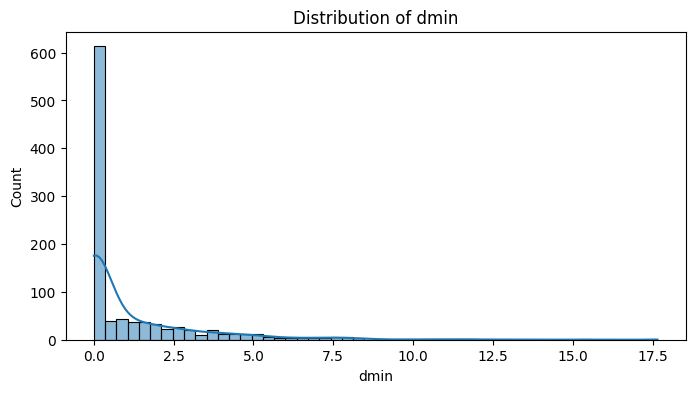

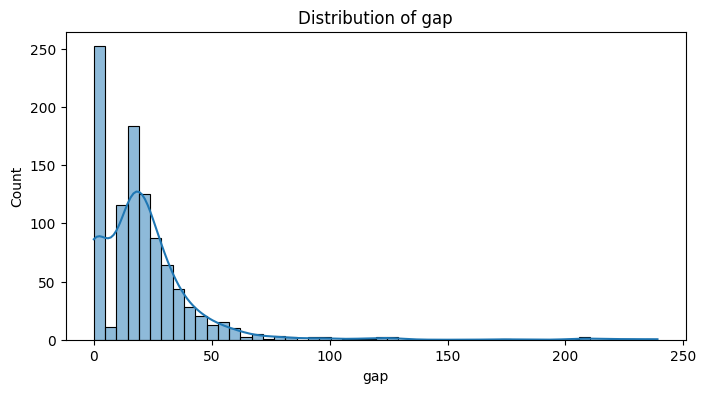

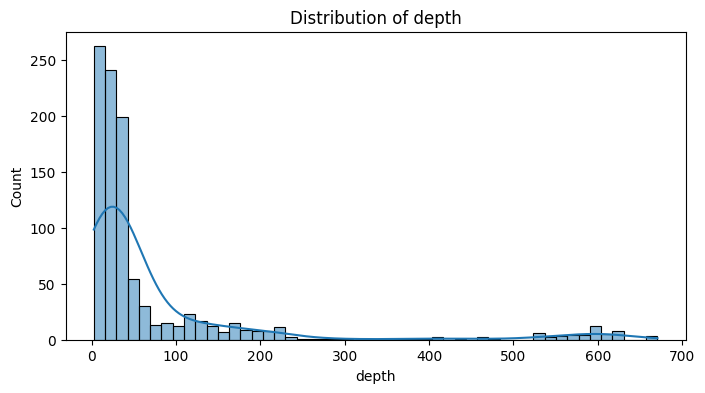

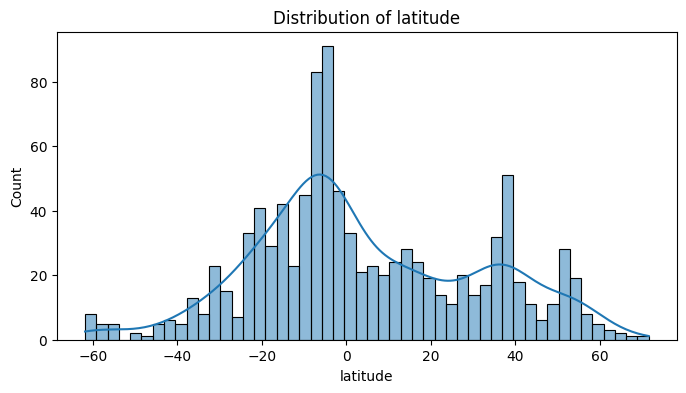

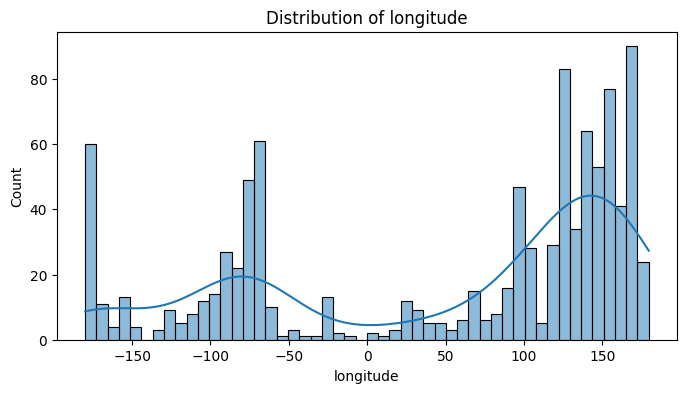

In [23]:
# 4. Distributions of numerical variables
# ----------------------------
num_cols = [col for col in df1.columns if df1[col].dtype in [np.int64, np.float64]]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df1[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

In [29]:
# 5. Time trends
# ----------------------------
if 'date' in df1.columns:
    df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
    df1['year'] = df1['date'].dt.year
    df1['month'] = df1['date'].dt.month

    plt.figure(figsize=(12,6))
    df1.groupby('year').size().plot(kind='bar')
    plt.title("Number of Earthquakes per Year")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.boxplot(x='year', y='magnitude', data=df1)
    plt.title("Earthquake Magnitude Trends by Year")
    plt.xticks(rotation=90)
    plt.show()


Geospatial map saved as earthquake_map.html


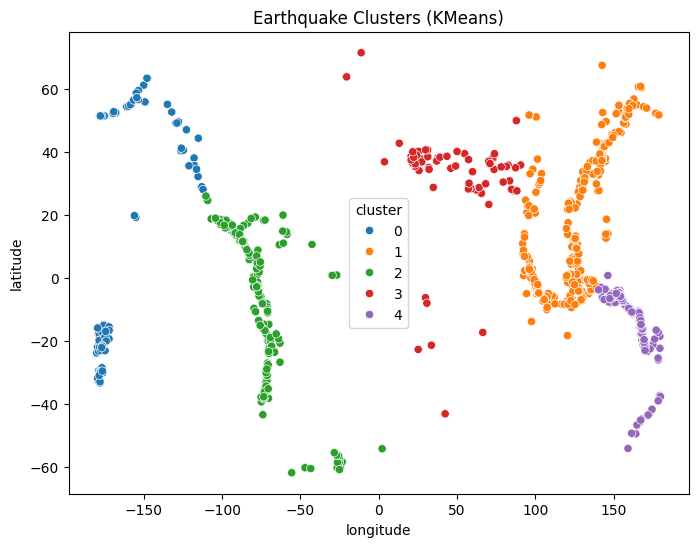

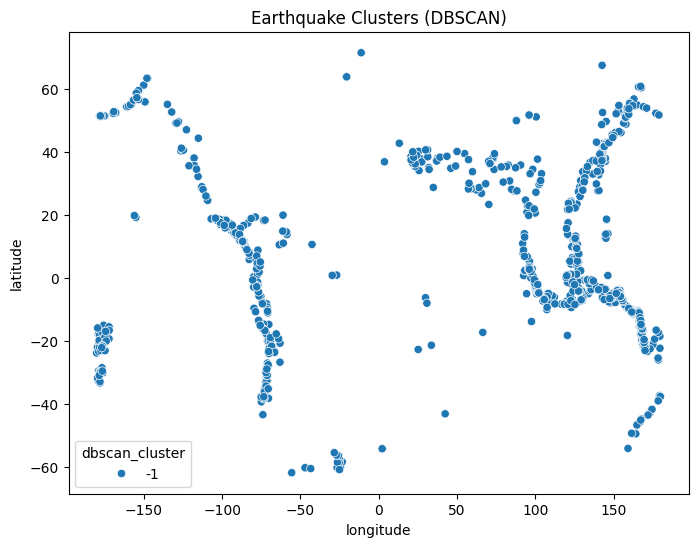

In [31]:
# ----------------------------
# 6. Geospatial visualization
# ----------------------------
if {'latitude', 'longitude'}.issubset(df1.columns):
    m = folium.Map(location=[0, 0], zoom_start=2)
    marker_cluster = MarkerCluster().add_to(m)
    
    for i, row in df1.sample(min(10000, len(df1))).iterrows():
        folium.Marker([row['latitude'], row['longitude']], 
                      popup=f"Magnitude: {row.get('magnitude', 'NA')} Depth: {row.get('depth', 'NA')}").add_to(marker_cluster)
    m.save("earthquake_map.html")
    print("Geospatial map saved as earthquake_map.html")

    # KMeans clustering
    coords = df1[['latitude', 'longitude']].dropna()
    kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
    coords['cluster'] = kmeans.fit_predict(coords)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=coords, palette='tab10')
    plt.title("Earthquake Clusters (KMeans)")
    plt.show()

    # DBSCAN clustering
    dbscan = DBSCAN(eps=1.5, min_samples=50)
    coords['dbscan_cluster'] = dbscan.fit_predict(coords[['latitude','longitude']])

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=coords, palette='tab20')
    plt.title("Earthquake Clusters (DBSCAN)")
    plt.show()

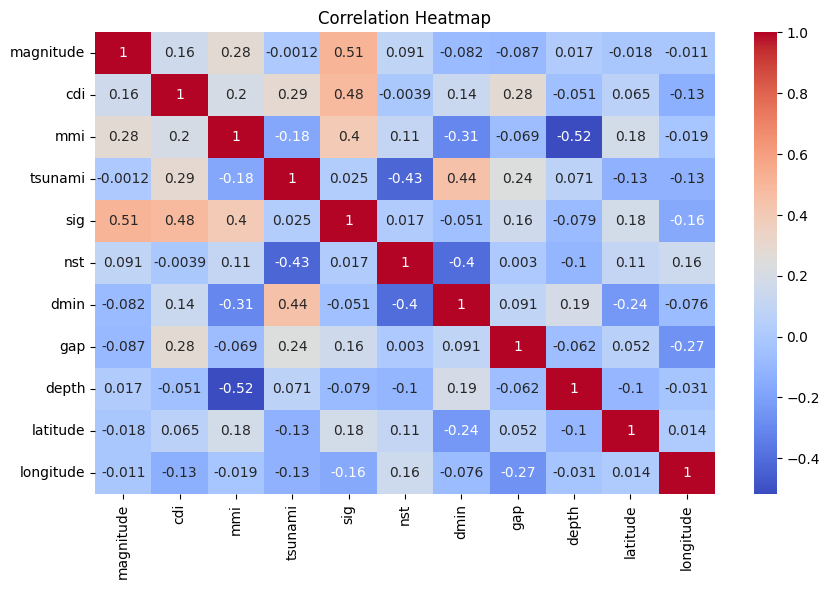

In [32]:
# ----------------------------
# 7. Correlation analysis
# ----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()